In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import os
import platform
import patoolib

In [ ]:
ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/home/pep/drive/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

fold_name = 'AI Specialist Support 02B'

path = ds_path + fold_name
os.chdir(ds_path)

if not os.path.exists(path):
    patoolib.extract_archive(f"{fold_name}.rar")

os.chdir(path)

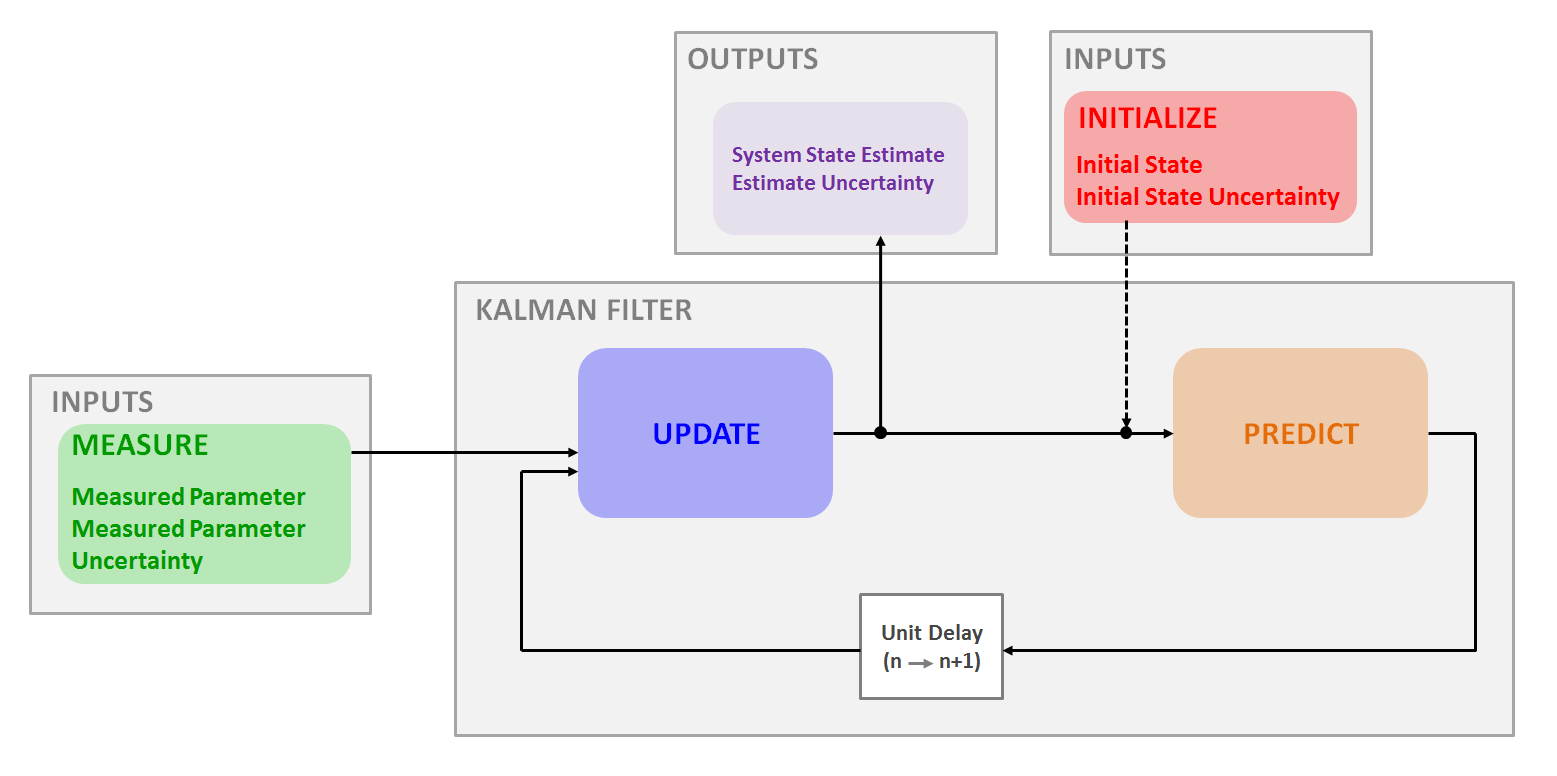

In [4]:
display(Image(filename='Kalman Filter.png'))

In [5]:
Facebook = pd.read_csv('Facebook.csv')
display(Facebook.head())
print(Facebook.shape)

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


(2227, 7)


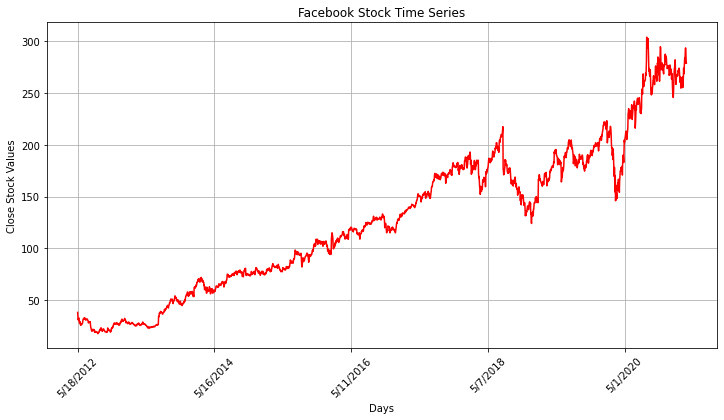

In [6]:
company = Facebook.copy()
companyName = "Facebook"

plt.figure(figsize=(12, 6))
plt.plot(company["Close"].values, "red", lw=1.5)
plt.xticks(range(0, company.shape[0], 500), company["Date"].loc[::500], rotation=45)
plt.title(f"{companyName} Stock Time Series")
plt.xlabel("Days")
plt.ylabel("Close Stock Values")
plt.grid()

In [ ]:
# !pip install pykalman

In [7]:
try:
    from pykalman import KalmanFilter
except:
    import subprocess
    subprocess.run(['pip', 'install', 'pykalman', '--quiet'])
    from pykalman import KalmanFilter

kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
                 initial_state_covariance = 1, observation_covariance = 1, transition_covariance = 0.0001)
mean, cov = kf.filter(company["Close"].values)
print(len(mean))

2227


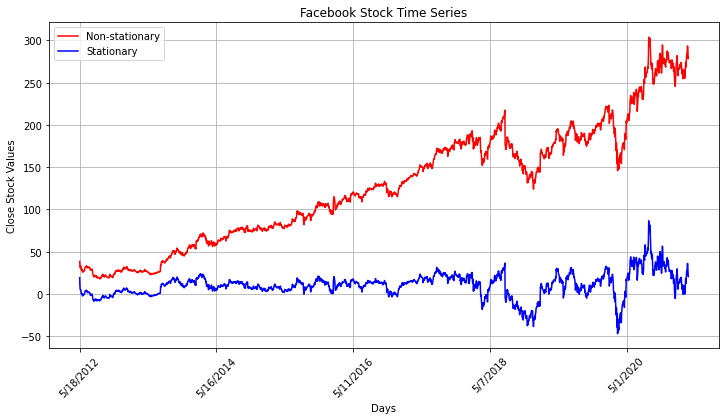

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(company["Close"].values, "red", lw=1.5, label="Non-stationary")
plt.plot(company["Close"].values - mean.flatten(), "blue", lw=1.5, label="Stationary")
plt.xticks(range(0, company.shape[0], 500), company["Date"].loc[::500], rotation=45)
plt.title(f"{companyName} Stock Time Series")
plt.xlabel("Days")
plt.ylabel("Close Stock Values")
plt.grid()
plt.legend()

In [9]:
# Data preparation
data = company.filter(["Open"])
display(data)
dataset = data.values
train_len = int(np.ceil(len(dataset) * 0.9))
train_len

,Open
0,42.049999
1,36.529999
2,32.610001
3,31.370001
4,32.950001
...,...
2222,281.220001
2223,290.450012
2224,293.149994
2225,291.000000


2005

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[:train_len]
print(train_data)
print(train_data.shape)

[[0.08497589]
 [0.06540697]
 [0.05151021]
 ...
 [0.66980999]
 [0.67370956]
 [0.68448668]]
(2005, 1)


In [43]:
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(X_train.shape)
print(y_train)

[[0.08497589 0.06540697 0.05151021 ... 0.0094654  0.01180516 0.01442853]
 [0.06540697 0.05151021 0.0471143  ... 0.01180516 0.01442853 0.01180516]
 [0.05151021 0.0471143  0.05271554 ... 0.01442853 0.01180516 0.00907544]
 ...
 [0.68143789 0.68576291 0.68104793 ... 0.66945546 0.65059559 0.64563243]
 [0.68576291 0.68104793 0.67275242 ... 0.65059559 0.64563243 0.66980999]
 [0.68104793 0.67275242 0.67867272 ... 0.64563243 0.66980999 0.67370956]]
(1945, 60)
[0.01180516 0.00907544 0.00836642 ... 0.66980999 0.67370956 0.68448668]


In [12]:
test_data = scaled_data[train_len - 60:]

X_test = []
y_test = dataset[train_len:]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

test_dates = company["Date"].values
testd = test_dates[train_len:]

print(X_test[:2])
print(len(X_test))
print(y_test[:5])
print(testd[:5])

[[0.67275242 0.67867272 0.69455473 0.69295945 0.70869967 0.70348838
  0.69271126 0.6513046  0.65289988 0.63496171 0.61592458 0.58359329
  0.62375921 0.63152297 0.60653005 0.59805728 0.56810125 0.5371526
  0.55512619 0.55278642 0.50148891 0.51563385 0.47589338 0.47029213
  0.43133153 0.45568631 0.48901022 0.46646342 0.4861387  0.49929097
  0.49691576 0.4967385  0.50021267 0.52254677 0.50886271 0.49992911
  0.49301614 0.50365142 0.5449163  0.54300198 0.55948664 0.5515811
  0.57040554 0.55696965 0.56675409 0.57118546 0.56483977 0.55718235
  0.56852664 0.58848554 0.58547218 0.61890245 0.60472207 0.61276939
  0.66945546 0.65059559 0.64563243 0.66980999 0.67370956 0.68448668]
 [0.67867272 0.69455473 0.69295945 0.70869967 0.70348838 0.69271126
  0.6513046  0.65289988 0.63496171 0.61592458 0.58359329 0.62375921
  0.63152297 0.60653005 0.59805728 0.56810125 0.5371526  0.55512619
  0.55278642 0.50148891 0.51563385 0.47589338 0.47029213 0.43133153
  0.45568631 0.48901022 0.46646342 0.4861387  0.4

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ANN_Model = Sequential()
ANN_Model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(units=64))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(units=1))

ANN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7808      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [14]:
from numpy.random import seed
seed(1)

ANN_Model.compile(optimizer="adam", loss="mean_squared_error")
ANN_Model.fit(X_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
122/122 [==============================] - 2s 2ms/step - loss: 0.0207
Epoch 2/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 3/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 4/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 5/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 6/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 7/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 8/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 9/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 10/10
122/122 [==============================] - 0s 1ms/step - loss: 0.0021


In [15]:
prediction = ANN_Model.predict(X_test)
y_pred = scaler.inverse_transform(prediction)
y_pred[:5]

array([[207.13141],
       [209.5848 ],
       [215.3259 ],
       [217.69292],
       [212.27495]], dtype=float32)

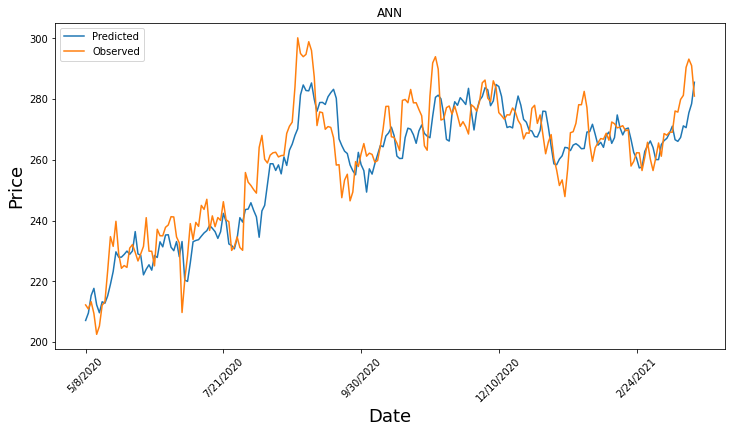

In [16]:
plt.figure(figsize=(12,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks(range(0,len(y_test),50), testd[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("ANN")
plt.show()


In [17]:
model_score = []
from sklearn import metrics
print("RMSE")
RMSE = metrics.mean_squared_error(y_pred, y_test, squared=False)
print(RMSE)
model_score.append(["ANN", RMSE])

RMSE
8.68795793998603


In [39]:
# Multilayer Perceptron
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 8), alpha=0.01, solver="lbfgs", shuffle=True)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_pred = y_pred.reshape(-1, 1)
y_pred = scaler.inverse_transform(y_pred)
y_pred[:10]

array([[212.30943695],
       [206.99396812],
       [207.48254857],
       [212.28645287],
       [212.32498761],
       [208.74904893],
       [206.43608813],
       [209.09940683],
       [208.61462112],
       [211.58518613]])

In [40]:
print('RMSE')
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)
model_score.append(["MLP", RMSE])


RMSE
10.348200946960436


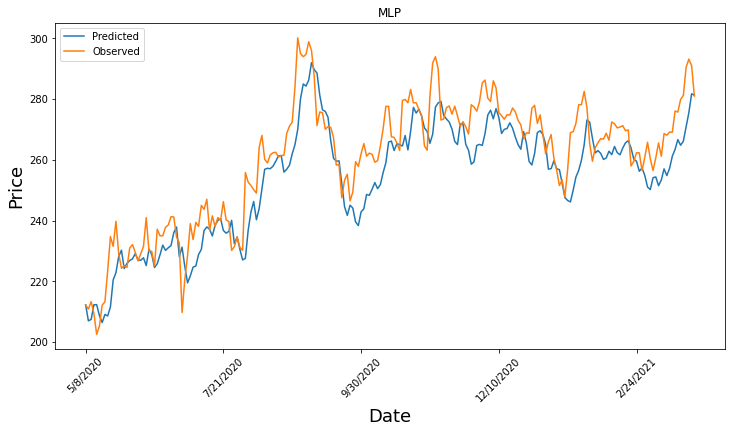

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks(range(0,len(y_test),50),testd[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("MLP")
plt.show()

In [46]:
Xtrain = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(Xtrain.shape)
Xtest = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(Xtest.shape)

(1945, 60, 1)
(222, 60, 1)


In [50]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(Xtrain, y_train, epochs=10, batch_size=2)


Epoch 1/10
973/973 [==============================] - 9s 9ms/step - loss: 0.0015
Epoch 2/10
973/973 [==============================] - 9s 9ms/step - loss: 2.3082e-04
Epoch 3/10
973/973 [==============================] - 9s 9ms/step - loss: 2.1682e-04
Epoch 4/10
973/973 [==============================] - 8s 9ms/step - loss: 1.9370e-04
Epoch 5/10
973/973 [==============================] - 9s 9ms/step - loss: 1.7195e-04
Epoch 6/10
973/973 [==============================] - 10s 10ms/step - loss: 1.6070e-04
Epoch 7/10
973/973 [==============================] - 10s 11ms/step - loss: 1.4403e-04
Epoch 8/10
973/973 [==============================] - 10s 10ms/step - loss: 1.4211e-04
Epoch 9/10
973/973 [==============================] - 10s 10ms/step - loss: 1.3311e-04
Epoch 10/10
973/973 [==============================] - 9s 9ms/step - loss: 1.3000e-04


In [51]:
prediction = model.predict(Xtest)
y_pred = scaler.inverse_transform(prediction)
print('RMSE')
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)
model_score.append(["RNN", RMSE])

RMSE
7.087249948940625


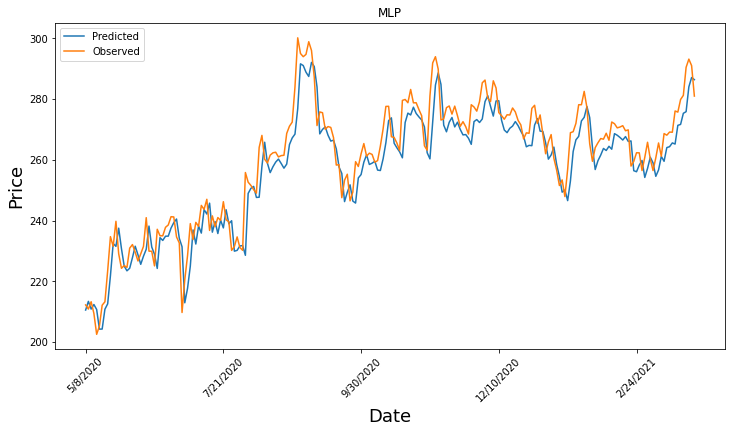

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks(range(0,len(y_test),50),testd[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("MLP")
plt.show()

In [58]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, return_sequences=True, input_shape=(Xtrain.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(8, return_sequences=False))
model.add(Dense(1))

In [62]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(Xtrain, y_train, batch_size=32, epochs=20)

Epoch 1/20
61/61 [==============================] - 7s 38ms/step - loss: 6.2751e-04
Epoch 2/20
61/61 [==============================] - 2s 35ms/step - loss: 5.3065e-04
Epoch 3/20
61/61 [==============================] - 2s 34ms/step - loss: 5.4360e-04
Epoch 4/20
61/61 [==============================] - 2s 37ms/step - loss: 4.9971e-04
Epoch 5/20
61/61 [==============================] - 2s 37ms/step - loss: 5.0558e-04
Epoch 6/20
61/61 [==============================] - 2s 33ms/step - loss: 4.8201e-04
Epoch 7/20
61/61 [==============================] - 2s 35ms/step - loss: 4.6647e-04
Epoch 8/20
61/61 [==============================] - 2s 37ms/step - loss: 4.6896e-04
Epoch 9/20
61/61 [==============================] - 2s 38ms/step - loss: 4.2750e-04
Epoch 10/20
61/61 [==============================] - 2s 38ms/step - loss: 4.3496e-04
Epoch 11/20
61/61 [==============================] - 2s 34ms/step - loss: 4.1553e-04
Epoch 12/20
61/61 [==============================] - 2s 32ms/step - loss: 

In [63]:
prediction = model.predict(Xtest)
y_pred = scaler.inverse_transform(prediction)
print('RMSE')
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)
model_score.append(["LSTM", RMSE])

RMSE
19.847416506925086


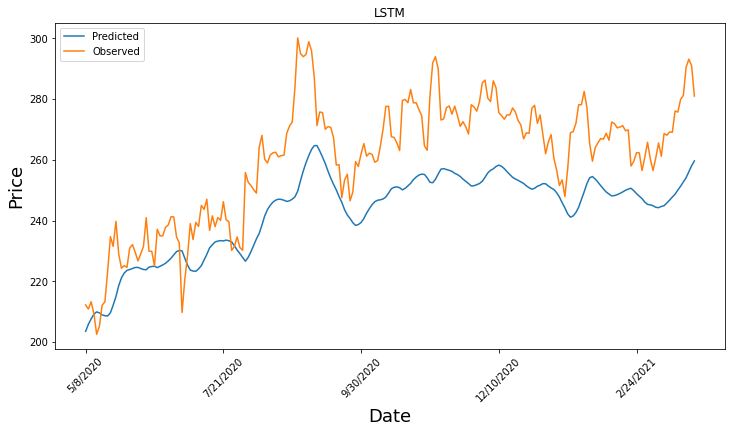

In [65]:
plt.figure(figsize=(12,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks(range(0,len(y_test),50),testd[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("LSTM")
plt.show()

In [66]:
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [67]:
encoding_dim = 256
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim, ))
# Encoder
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
# Decoder
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(1, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)